In [1]:
# Import modules

from music21 import *

from calculators import *
from boundaryDetection import *
from graphUtilities import *
from annealerUtilities import *

In [2]:
# https://www.music21.org/music21docs/about/referenceCorpus.html#referencecorpus

beethoven = corpus.parse("beethoven/opus74.mxl")
excerpt = beethoven.measures(1, 13)

excerpt.show("text")
#violin.show("midi")


{0.0} <music21.instrument.Instrument 'P1: Violin I: '>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.expressions.TextExpression 'Poco Adagio'>
    {0.0} <music21.expressions.TextExpression 'sotto voce'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of E- major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Note E->
    {2.0} <music21.note.Note G>
    {3.5} <music21.note.Note A->
{0.0} <music21.spanner.Slur <music21.note.Note E-><music21.note.Note A->>
{0.0} <music21.spanner.Slur <music21.note.Note E-><music21.note.Note A->>
{0.0} <music21.spanner.Slur <music21.note.Note E-><music21.note.Note B->>
{0.0} <music21.spanner.Slur <music21.note.Note B-><music21.note.Note A->>
{0.0} <music21.spanner.Slur <music21.note.Note A-><music21.note.Note G>>
{0.0} <music21.spanner.Slur <music21.note.Note G><music21.note.Note F>>
{0.0} <music21.dynamics.Crescendo <music21.note.Note E><music21.note.Note A->>
{0.0} <music21.spanner.Slur <music21.note.

In [3]:
# Boundary detection

beethoven = corpus.parse("beethoven/opus74.mxl")
excerpt = beethoven.measures(1, 13)

phraseStack = []
phraseEntropies = []

for part in excerpt.parts:
    boundaries = identifyBoundaries(part, 0.4)
    print(boundaries)
    phrases = extractPhrases(part, boundaries, f"{part.id}")    
    phraseStack.append(phrases)

[2.0, 8.0, 16.0, 36.0, 52.0]
[2.0, 8.0, 12.0, 14.0, 32.0, 37.0, 52.0]
[2.0, 8.0, 12.0, 15.0, 22.0, 23.0, 24.0, 26.0, 32.0, 52.0]
[2.0, 8.0, 12.0, 16.0, 19.0, 20.0, 23.0, 24.0, 28.0, 30.0, 52.0]


In [4]:
flatStack = [phrase for phrases in phraseStack for phrase in phrases]
print(len(flatStack))

uniquePairs = [(i, j) for i in range(len(flatStack)) for j in range(i+1, len(flatStack))]

for i, j in uniquePairs:
    print(flatStack[i].id, flatStack[j].id, hasOverlap(flatStack[i], flatStack[j]))

33
Violin I_1 Violin I_2 False
Violin I_1 Violin I_3 False
Violin I_1 Violin I_4 False
Violin I_1 Violin I_5 False
Violin I_1 Violin II_1 True
Violin I_1 Violin II_2 False
Violin I_1 Violin II_3 False
Violin I_1 Violin II_4 False
Violin I_1 Violin II_5 False
Violin I_1 Violin II_6 False
Violin I_1 Violin II_7 False
Violin I_1 Viola_1 True
Violin I_1 Viola_2 False
Violin I_1 Viola_3 False
Violin I_1 Viola_4 False
Violin I_1 Viola_5 False
Violin I_1 Viola_6 False
Violin I_1 Viola_7 False
Violin I_1 Viola_8 False
Violin I_1 Viola_9 False
Violin I_1 Viola_10 False
Violin I_1 Violoncello_1 True
Violin I_1 Violoncello_2 False
Violin I_1 Violoncello_3 False
Violin I_1 Violoncello_4 False
Violin I_1 Violoncello_5 False
Violin I_1 Violoncello_6 False
Violin I_1 Violoncello_7 False
Violin I_1 Violoncello_8 False
Violin I_1 Violoncello_9 False
Violin I_1 Violoncello_10 False
Violin I_1 Violoncello_11 False
Violin I_2 Violin I_3 False
Violin I_2 Violin I_4 False
Violin I_2 Violin I_5 False
Violin 

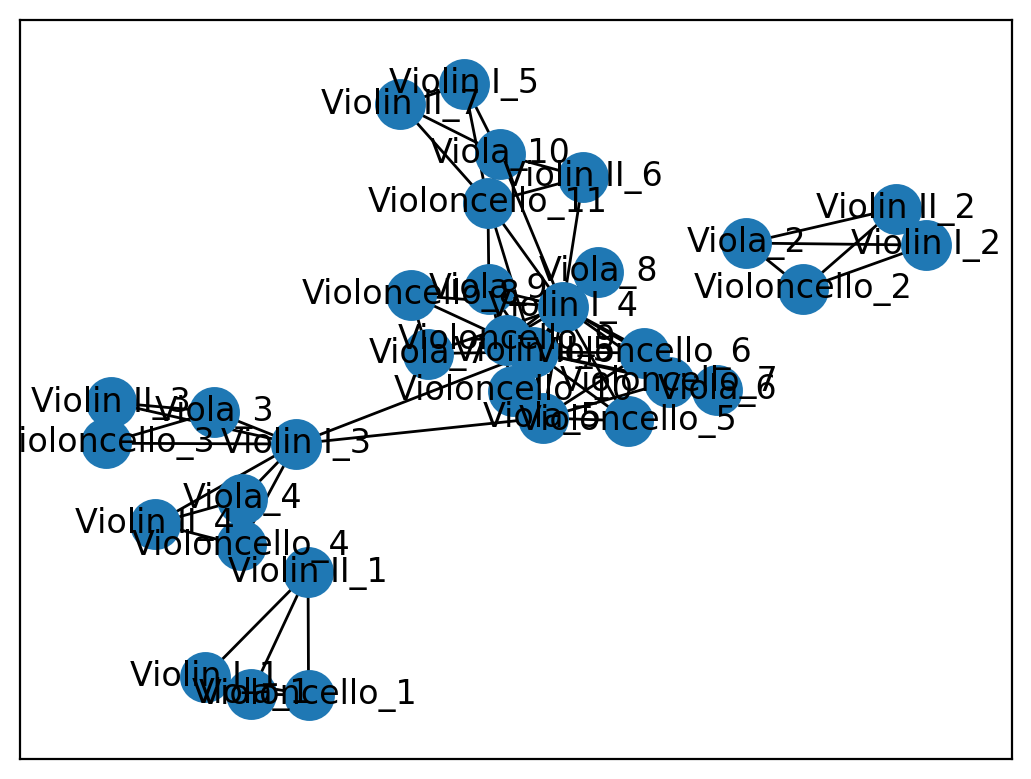

In [5]:
edges = []

for i, j in uniquePairs:
    if hasOverlap(flatStack[i], flatStack[j]):
        edges.append((flatStack[i].id, flatStack[j].id))

G = defineGraph(edges)
pos = nx.spring_layout(G, k=0.5) # Force specific layout
plotGraph(G, pos)

                                              sample      energy  \
0  {'Viola_1': 0, 'Viola_10': 0, 'Viola_2': 0, 'V...  -44.328260   
1  {'Viola_1': 0, 'Viola_10': 0, 'Viola_2': 0, 'V...  -43.687374   
2  {'Viola_1': 0, 'Viola_10': 0, 'Viola_2': 1, 'V...  -43.442633   
3  {'Viola_1': 1, 'Viola_10': 0, 'Viola_2': 0, 'V...  -42.823658   
4  {'Viola_1': 1, 'Viola_10': 0, 'Viola_2': 0, 'V...  154.869404   

   num_occurrences  chain_break_fraction  
0                1              0.000000  
1                1              0.000000  
2                1              0.000000  
3                1              0.000000  
4                1              0.030303  
['Viola_3', 'Violin II_1', 'Violin II_2', 'Violin II_7', 'Violin I_4', 'Violoncello_4']
6


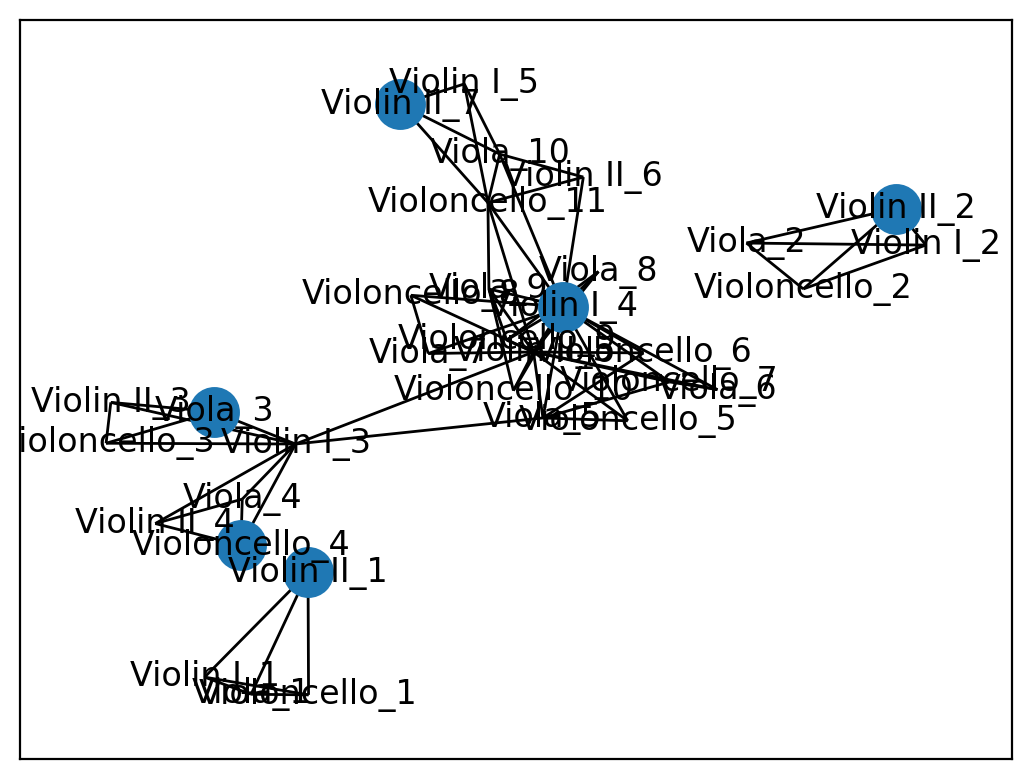

In [8]:
# Solve on QPU

phraseEntropies = [(phrase.id, phrase.entropy) for phrase in flatStack]

df = solveWeightedMIS(G, phraseEntropies, num_reads=1000, strength_multiplier = 3)
print(df.head())

sample = df["sample"][0]
chosen = [x for x in sample if sample[x] == 1]

print(chosen)
print(len(chosen))

plotGraph(G, pos, nodeList=chosen)

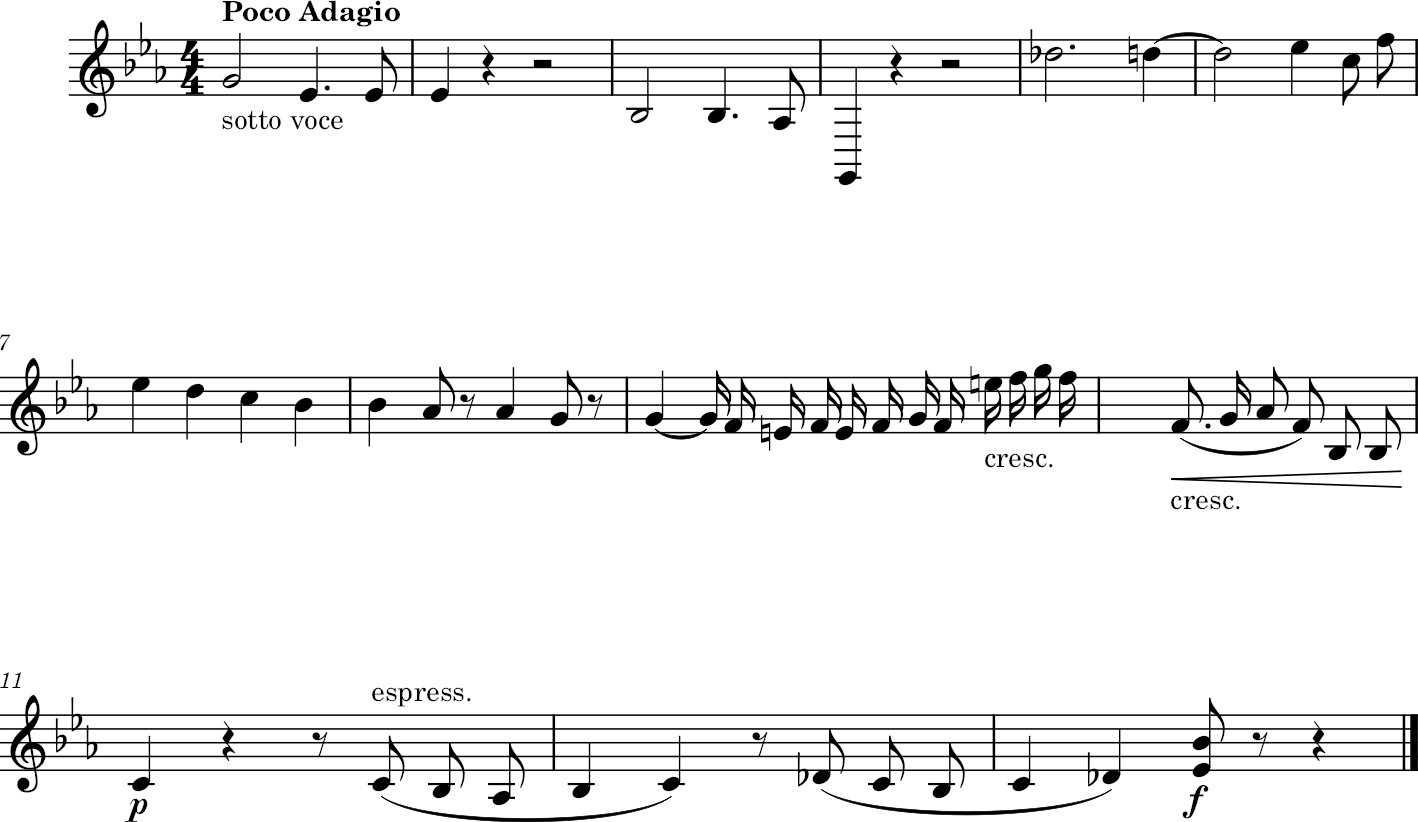

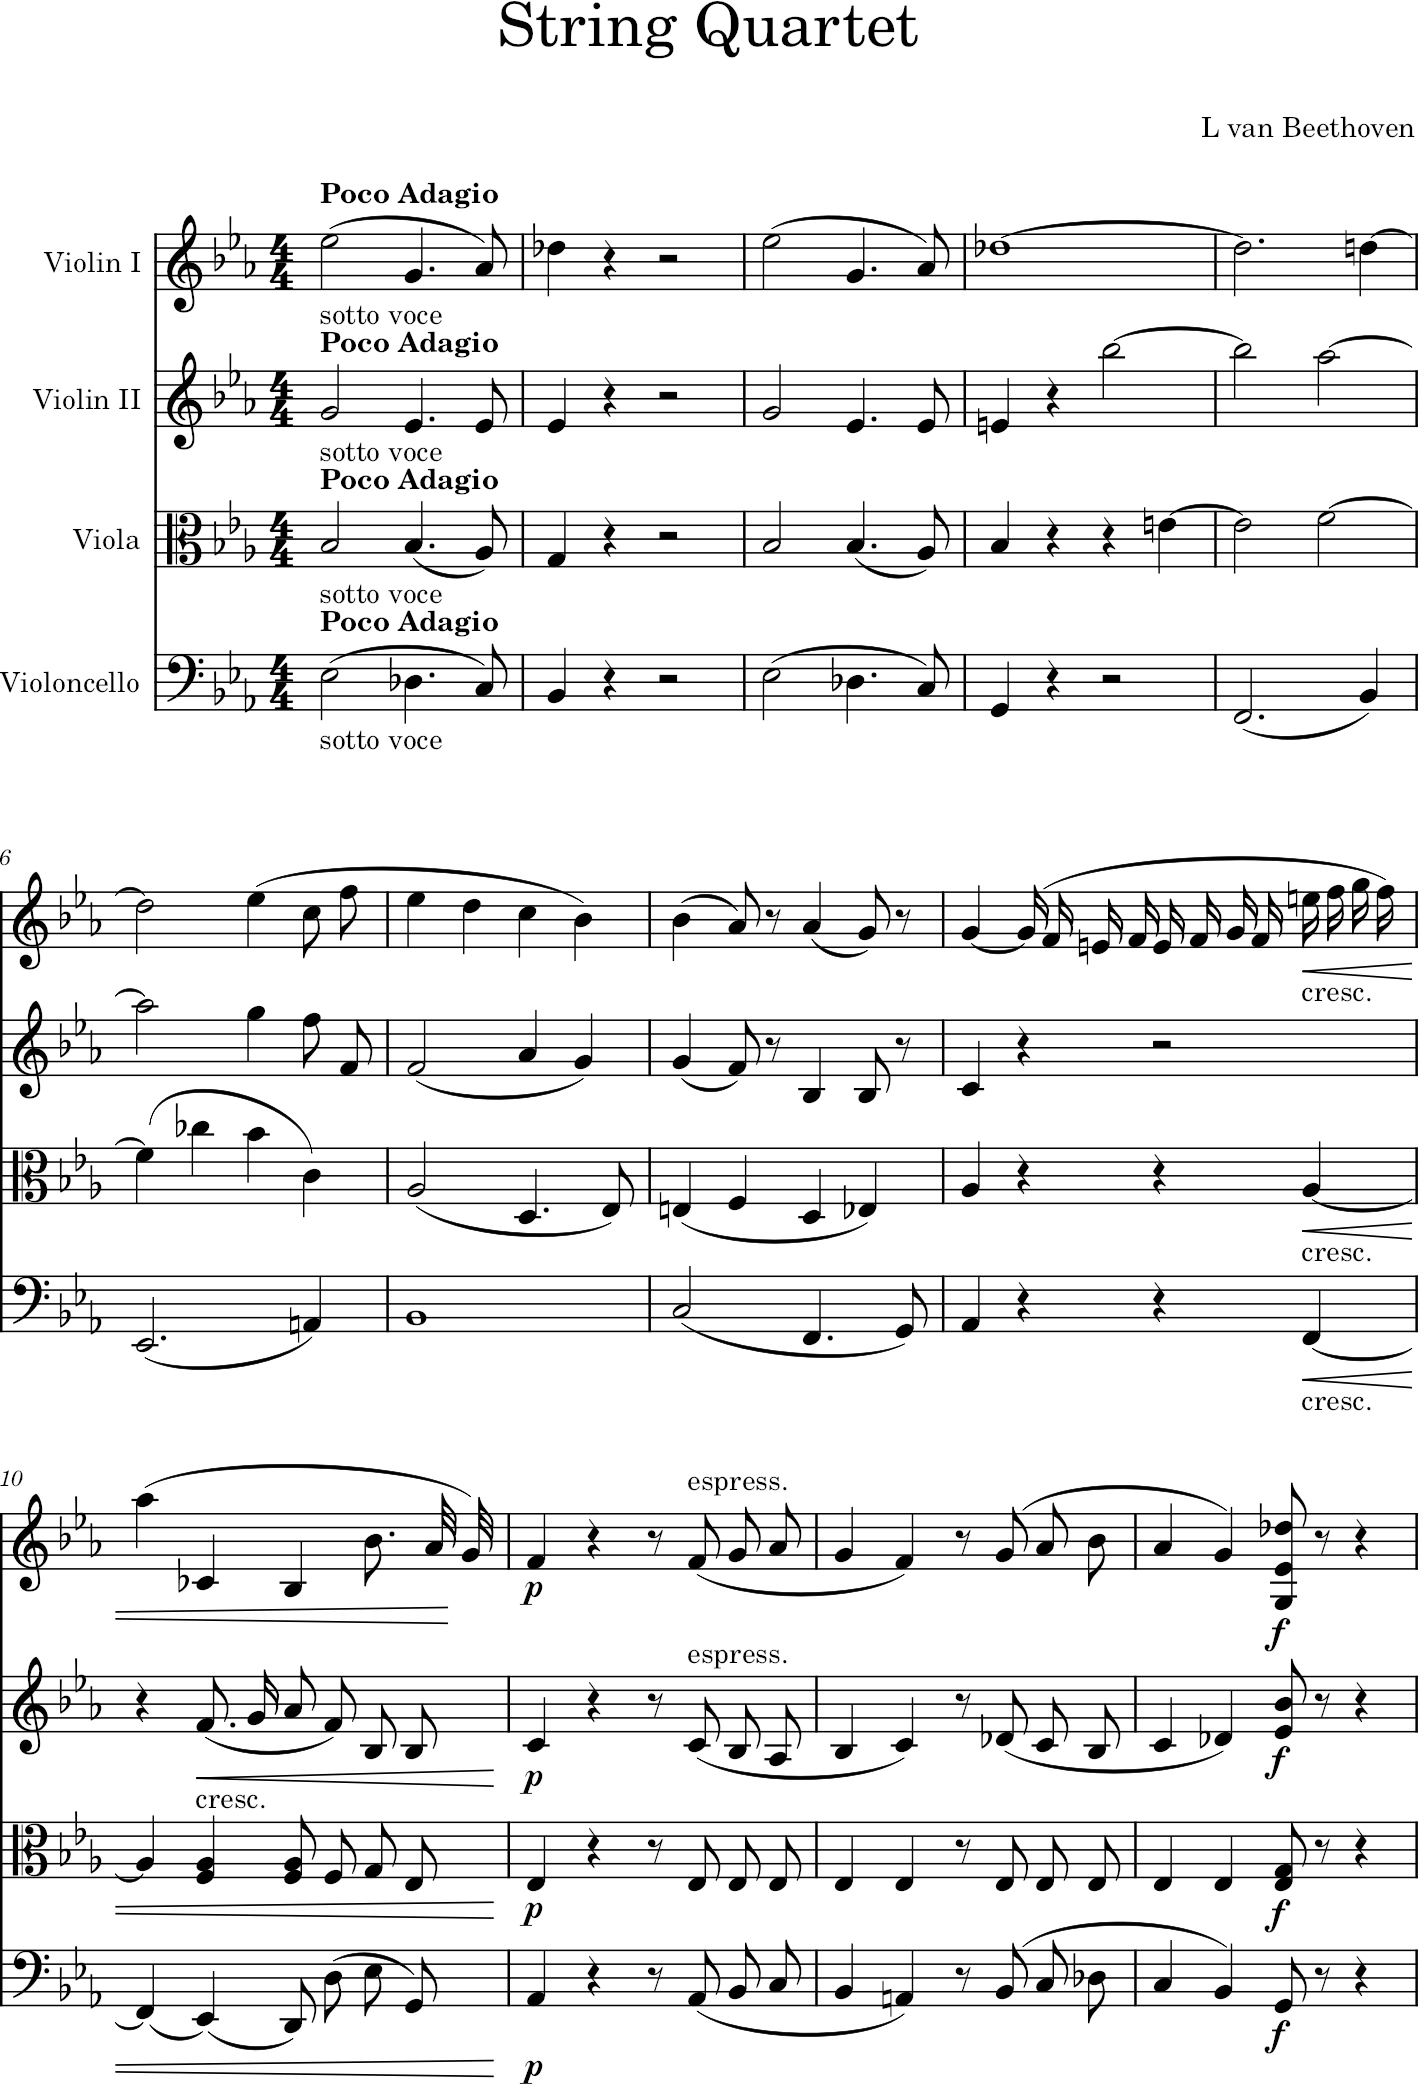

In [9]:
arrangement = stream.Stream()

for phrase in flatStack:
    if phrase.id in chosen:
        arrangement.mergeElements(phrase)

arrangement.show()
arrangement.show("midi")
excerpt.show()

In [ ]:
test.plot("histogram", "pitchClass", dpi=600)

In [ ]:
class EntropyAxis(graph.axis.Axis):
    labelDefault = 'Entropy'

    def extractOneElement(self, el, formatDict):
        if hasattr(el, 'name'):
            return noteEntropy(el)
        
plotS = graph.plot.Scatter(violin)

plotS.title = 'Offset vs Entropy'
plotS.axisX = graph.axis.OffsetAxis(plotS, 'x')
plotS.axisY = EntropyAxis(plotS, 'y')

plotS.run()